In [159]:
import pandas as pd
import numpy as np

#### Importing the Dataset

In [160]:
laptop_dt=pd.read_csv("laptop_data_cleaned.csv")
laptop_dt.sample(7)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
583,Dell,Notebook,16,1.93,11.313402,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
1129,HP,Gaming,8,3.35,11.004649,0,1,127.335675,Intel Core i5,1000,128,Nvidia,Windows
924,Lenovo,2 in 1 Convertible,8,1.37,11.484896,1,1,165.632118,Intel Core i5,0,512,Intel,Windows
424,Dell,Gaming,16,4.42,11.912579,0,1,169.780899,Intel Core i7,1000,256,Nvidia,Windows
472,Google,Ultrabook,8,1.10,11.126262,1,0,234.507400,Intel Core i5,0,128,Intel,Others
901,Asus,Gaming,32,3.58,11.129395,0,1,127.335675,Intel Core i7,0,512,Nvidia,Windows
1171,HP,Notebook,16,2.10,11.030874,0,0,141.211998,Intel Core i7,0,512,Intel,Windows


In [161]:
laptop_dt.shape

(1273, 13)

In [162]:
laptop_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


#### This shows us That this dataset has 13 columns and all have different data types with 1273 rows in each column

In [163]:
laptop_dt.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [164]:
laptop_dt.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [165]:
laptop_dt=laptop_dt.drop_duplicates()
laptop_dt.shape

(1272, 13)

##### Dataset had 1 Duplicated Row

In [166]:
laptop_dt.Company.value_counts() 

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

### Detecting And Removing outliers

<Axes: ylabel='Weight'>

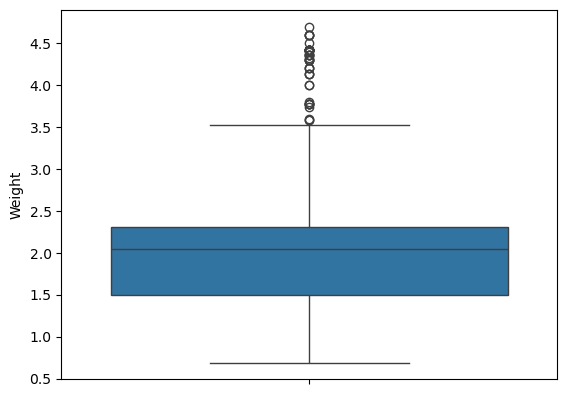

In [167]:
import seaborn as sns
sns.boxplot(data=laptop_dt.Weight)

In [168]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = laptop_dt['Weight'].quantile(0.25)
Q3 = laptop_dt['Weight'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
laptop_dt = laptop_dt[(laptop_dt['Weight'] >= lower_bound) & (laptop_dt['Weight'] <= upper_bound)]


In [169]:
laptop_dt.Ram.value_counts()

Ram
8     612
4     364
16    170
6      35
12     23
2      16
32      5
24      2
Name: count, dtype: int64

In [170]:
laptop_dt.Gpu_brand.value_counts()

Gpu_brand
Intel     702
Nvidia    352
AMD       173
Name: count, dtype: int64

In [171]:
laptop_dt.Os.value_counts()

Os
Windows    1055
Others      151
Mac          21
Name: count, dtype: int64

In [172]:
laptop_dt.TypeName.value_counts()

TypeName
Notebook              704
Ultrabook             194
Gaming                161
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [173]:
laptop_dt.Cpu_brand.value_counts()

Cpu_brand
Intel Core i7            470
Intel Core i5            422
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64

In [174]:
laptop_dt.HDD.value_counts()

HDD
0       707
1000    361
500     125
2000     32
32        1
128       1
Name: count, dtype: int64

In [175]:
laptop_dt.SSD.value_counts()

SSD
256     480
0       432
128     161
512     122
1000     13
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64

### We See That Execpt Company We Can Every Categorical Column into Numbers to Improve Efficiency

In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
label_encoder = LabelEncoder()
laptop_dt['encoded_Os'] = label_encoder.fit_transform(laptop_dt['Os'])
laptop_dt['encoded_TypeName'] = label_encoder.fit_transform(laptop_dt['TypeName'])
laptop_dt['encoded_Cpu_brand'] = label_encoder.fit_transform(laptop_dt['Cpu_brand'])
laptop_dt['encoded_Gpu_brand'] = label_encoder.fit_transform(laptop_dt['Gpu_brand'])
laptop_dt['encoded_Company'] = label_encoder.fit_transform(laptop_dt['Company'])
laptop_dt.sample(7)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,encoded_Os,encoded_TypeName,encoded_Cpu_brand,encoded_Gpu_brand,encoded_Company
158,Dell,2 in 1 Convertible,8,1.560,10.931154,1,0,141.211998,Intel Core i7,0,256,Intel,Windows,2,0,3,1,4
670,Microsoft,Ultrabook,8,1.252,11.508104,1,0,200.842560,Intel Core i7,0,256,Intel,Windows,2,4,3,1,13
719,HP,Notebook,8,2.630,11.065638,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows,2,3,3,2,7
1015,Toshiba,Notebook,8,1.500,11.073937,0,0,117.826530,Intel Core i5,0,256,Intel,Windows,2,3,2,1,16
967,HP,Notebook,4,2.040,10.504980,0,0,141.211998,Intel Core i3,500,0,Intel,Windows,2,3,1,1,7
662,Lenovo,Notebook,4,2.200,10.257828,0,0,141.211998,Intel Core i5,500,0,Intel,Windows,2,3,2,1,10
412,HP,Notebook,4,2.100,10.126164,0,0,141.211998,Intel Core i3,1000,0,AMD,Windows,2,3,1,0,7


### Now We Will Predict The Price of The Laptop With All Its Features

### First let's Divide The Data in Train And Test using Holdout Method

In [178]:
x=laptop_dt[['encoded_Company','encoded_Os','encoded_TypeName','encoded_Cpu_brand','encoded_Gpu_brand','Ram','Weight','TouchScreen','Ips','Ppi']]
y=laptop_dt.Price

In [179]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=42)

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.15522064751467501

In [181]:
model.score(x_train,y_train)

0.6018360130535301

### Model is 63% Accurate we can Drop certain Columns to Increase it or Use Other Test_Train Split Method

## Using K_Fold Method to Train_Test_Split

In [182]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=3, shuffle=True, random_state=42)

r2_scores = []
for train_index, test_index in kf.split(x):
    x_train1, x_test1 = x.iloc[train_index], x.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    
    model1 = LinearRegression()
    model1.fit(x_train1, y_train1)
    y_pred1 = model1.predict(x_test1)
    r2 = r2_score(y_test1, y_pred1)
    r2_scores.append(r2)

average_r2 = sum(r2_scores) / len(r2_scores)
print("Average R-squared score:", average_r2)

Average R-squared score: 0.5898393046688295


In [183]:
model1.score(x_train1,y_train1)

0.5939273302632395

#### Holdout Mehod Gave Better Accuracy Than K_Fold_Method

### Now We can Predict The Prices of Any Laptop With Its Given Features

In [187]:
#Example
model.predict([[7,2,2,3,2,16,2.2,0,1,140.1]])


C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.53504037])